In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL, Task, URIRef

In [2]:
jasper = RSPEngine("http://docker.for.mac.localhost:8181/jasper")

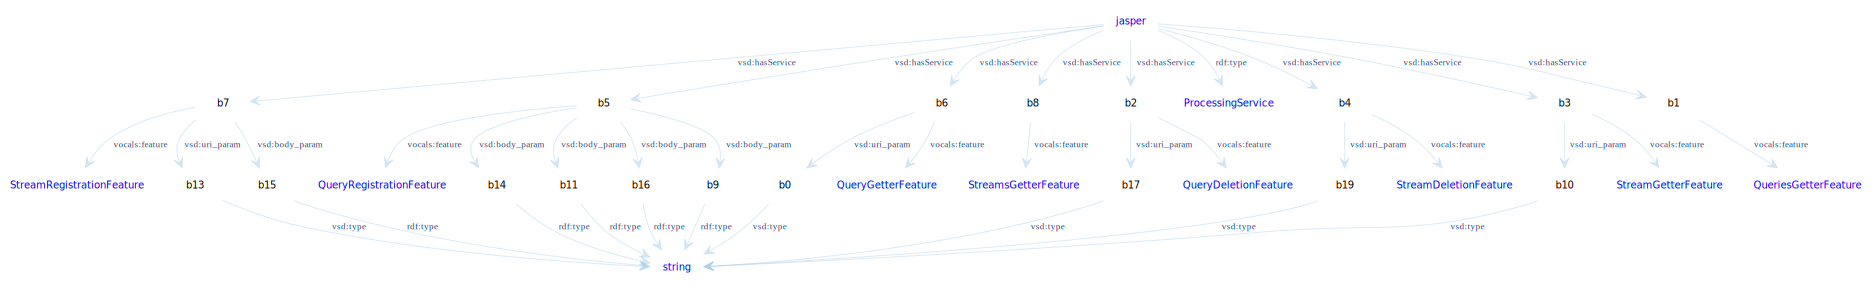

In [6]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png
data, metadata = draw_graph(jasper.service().g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [17]:
jasper.streams()

[]

In [18]:
jasper.tasks()

[]

In [7]:
qid  = "redcount"
tbox = "http://mynotebook:8888/files/colors.owl"
frmt = "JSON"
body ="""
        SELECT (COUNT(?r) as ?numRed)
        FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
        WHERE {
                WINDOW ?rw { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red> .}
            }
      """

In [8]:
redcount_query = jasper.create(qid, body, tbox, frmt)


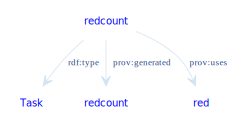

In [10]:
data, metadata = draw_graph(redcount_query.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [13]:
redcount_query.sources()

[GET http://redstream:1255/red]

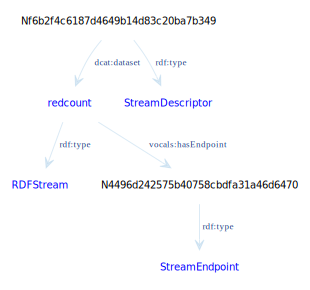

In [23]:
redcount_stream = redcount_query.stream()
data, metadata = draw_graph(redcount_stream.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)


# The stream has no endpoint. 

In [21]:
redcount_stream.endpoints()

[]

In [18]:
# We need to expose it!

In [16]:
r = jasper.expose(qid, 'HTTP', retention=5)

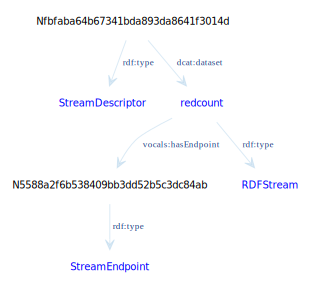

In [17]:
data, metadata = draw_graph(r.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [18]:
jasper.streams()

[http://shapestream:4000/shapes,
 http://redstream:1255/red,
 http://jasper:8181/jasper/streams/redcount,
 http://jasper:8181/jasper/streams/CntHouses,
 http://jasper:8181/jasper/streams/assemble,
 http://jasper:8181/jasper/streams/assemble]

In [24]:
endpoints = redcount_stream.endpoints()

In [25]:
endpoint = endpoints[0]

In [28]:
resp = endpoint.call()
resp

In [29]:
df = resp.flatten().dataframe(['results_bindings_0_numRed_value'])

In [30]:
df

,head_vars_0,results_bindings_0_numRed_datatype,results_bindings_0_numRed_type,results_bindings_0_numRed_value
0,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,4
1,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,6
2,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,5
3,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,7
4,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,7


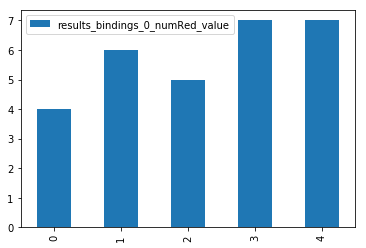

In [31]:
% matplotlib inline
df.plot(kind='bar')

In [28]:
jasper.delete(qid)